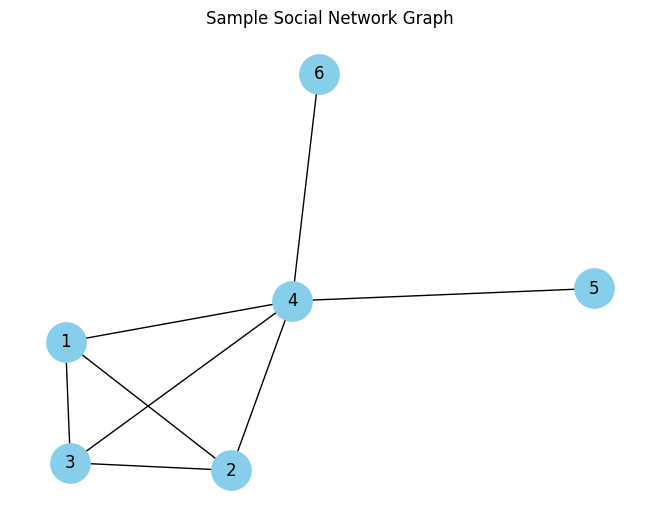

Number of nodes: 6
Number of edges: 8
Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (4, 6)]
Degree Centrality: {1: 0.6000000000000001, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 1.0, 5: 0.2, 6: 0.2}
Betweenness Centrality: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.7000000000000001, 5: 0.0, 6: 0.0}
Clustering Coefficient: {1: 1.0, 2: 1.0, 3: 1.0, 4: 0.3, 5: 0, 6: 0}


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample social network graph
G = nx.Graph()

# # Load dataset from CSV file
# G = nx.read_edgelist('dataset.csv', delimiter=',')

# Add nodes (representing individuals)
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges (representing connections between individuals)
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (4, 6)])

# Visualize the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=12)
plt.title('Sample Social Network Graph')
plt.show()

# Basic graph information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Degree centrality (how connected a node is)
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Betweenness centrality (how important a node is in connecting others)
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)

# Clustering coefficient (how close the neighbors of a node are to being a complete graph)
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:", clustering_coefficient)


In [2]:
from ogb.nodeproppred import PygNodePropPredDataset

# Load the dataset
dataset = PygNodePropPredDataset(name='ogbn-mag')

In [3]:
print(f"Type: {type(dataset)}\nLength: {len(dataset)}\n")

Type: <class 'ogb.nodeproppred.dataset_pyg.PygNodePropPredDataset'>
Length: 1



In [4]:
dataset.get_idx_split() 

{'train': {'paper': tensor([     0,      1,      2,  ..., 736386, 736387, 736388])},
 'valid': {'paper': tensor([   332,    756,    784,  ..., 736364, 736367, 736370])},
 'test': {'paper': tensor([   359,    411,    608,  ..., 736358, 736384, 736385])}}

In [5]:
data = dataset[0]
data

Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
)

In [6]:
type(data)

torch_geometric.data.data.Data

In [7]:
data.num_nodes_dict

{'author': 1134649,
 'field_of_study': 59965,
 'institution': 8740,
 'paper': 736389}

In [8]:
data.edge_index_dict

{('author',
  'affiliated_with',
  'institution'): tensor([[      0,       1,       2,  ..., 1134645, 1134647, 1134648],
         [    845,     996,    3197,  ...,    5189,    4668,    4668]]),
 ('author',
  'writes',
  'paper'): tensor([[      0,       0,       0,  ..., 1134647, 1134648, 1134648],
         [  19703,  289285,  311768,  ...,  657395,  671118,  719594]]),
 ('paper',
  'cites',
  'paper'): tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
         [    88,  27449, 121051,  ..., 421711, 427339, 439864]]),
 ('paper',
  'has_topic',
  'field_of_study'): tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
         [   145,   2215,   3205,  ...,  21458,  22283,  31934]])}

In [9]:
data.x_dict

{'paper': tensor([[-0.0954,  0.0408, -0.2109,  ...,  0.0616, -0.0277, -0.1338],
         [-0.1510, -0.1073, -0.2220,  ...,  0.3458, -0.0277, -0.2185],
         [-0.1148, -0.1760, -0.2606,  ...,  0.1731, -0.1564, -0.2780],
         ...,
         [ 0.0228, -0.0865,  0.0981,  ..., -0.0547, -0.2077, -0.2305],
         [-0.2891, -0.2029, -0.1525,  ...,  0.1042,  0.2041, -0.3528],
         [-0.0890, -0.0348, -0.2642,  ...,  0.2601, -0.0875, -0.5171]])}

In [10]:
data.node_year

{'paper': tensor([[2015],
         [2012],
         [2012],
         ...,
         [2016],
         [2017],
         [2014]])}

In [11]:
data.edge_reltype

{('author',
  'affiliated_with',
  'institution'): tensor([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]),
 ('author',
  'writes',
  'paper'): tensor([[3],
         [3],
         [3],
         ...,
         [3],
         [3],
         [3]]),
 ('paper',
  'cites',
  'paper'): tensor([[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]),
 ('paper',
  'has_topic',
  'field_of_study'): tensor([[2],
         [2],
         [2],
         ...,
         [2],
         [2],
         [2]])}

In [12]:
data.y_dict

{'paper': tensor([[246],
         [131],
         [189],
         ...,
         [266],
         [289],
         [  1]])}

In [13]:
data['edge_index_dict'].keys()

dict_keys([('author', 'affiliated_with', 'institution'), ('author', 'writes', 'paper'), ('paper', 'cites', 'paper'), ('paper', 'has_topic', 'field_of_study')])

In [14]:
for item in data['edge_index_dict'].items():
  print(item)

(('author', 'affiliated_with', 'institution'), tensor([[      0,       1,       2,  ..., 1134645, 1134647, 1134648],
        [    845,     996,    3197,  ...,    5189,    4668,    4668]]))
(('author', 'writes', 'paper'), tensor([[      0,       0,       0,  ..., 1134647, 1134648, 1134648],
        [  19703,  289285,  311768,  ...,  657395,  671118,  719594]]))
(('paper', 'cites', 'paper'), tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
        [    88,  27449, 121051,  ..., 421711, 427339, 439864]]))
(('paper', 'has_topic', 'field_of_study'), tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
        [   145,   2215,   3205,  ...,  21458,  22283,  31934]]))


## Chapter using code from Oficial OGB Dataset Paper

## GCN

In [35]:
# import libraries 
import torch
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, SAGEConv

In [36]:
# define GCN
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers,
                 dropout):
        super(GCN, self).__init__()

        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(in_channels, hidden_channels, cached=True))
        self.bns = torch.nn.ModuleList()
        self.bns.append(torch.nn.BatchNorm1d(hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(
                GCNConv(hidden_channels, hidden_channels, cached=True))
            self.bns.append(torch.nn.BatchNorm1d(hidden_channels))
        self.convs.append(GCNConv(hidden_channels, out_channels, cached=True))

        self.dropout = dropout

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        for i, conv in enumerate(self.convs[:-1]):
            x = conv(x, adj_t)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, adj_t)
        return x.log_softmax(dim=-1)

In [37]:
#Define train and test
def train(model, data, train_idx, optimizer):
    model.train()

    optimizer.zero_grad()
    out = model(data.x, data.adj_t)[train_idx]
    loss = F.nll_loss(out, data.y.squeeze(1)[train_idx])
    loss.backward()
    optimizer.step()

    return loss.item()

In [38]:

@torch.no_grad()
def test(model, data, split_idx, evaluator):
    model.eval()

    out = model(data.x, data.adj_t)
    y_pred = out.argmax(dim=-1, keepdim=True)
    
    # update the evaluator
    train_acc = evaluator.eval({'y_true': data.y[split_idx['train']],
                                'y_pred': y_pred[split_idx['train']],
                               })['acc']
    valid_acc = evaluator.eval({'y_true': data.y[split_idx['valid']],
                                'y_pred': y_pred[split_idx['valid']],
                               })['acc']
    test_acc = evaluator.eval({'y_true': data.y[split_idx['test']],
                               'y_pred': y_pred[split_idx['test']],
                              })['acc']

    return train_acc, valid_acc, test_acc

In [39]:
# define the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device)

## Dataset

In [49]:
#From node property prediction import :
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

# download the dataset
dataset = PygNodePropPredDataset(name='ogbn-arxiv',transform=T.Compose([T.ToUndirected(),T.ToSparseTensor()]))

# Dictionary with keys: 'train', 'valid', 'test'
split_idx = dataset.get_idx_split()

In [50]:
data = dataset[0]
data = data.to(device) # move the data to the device

In [51]:
data

Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343])

In [30]:
# Torch.tensor containing the indices of training indices
train_idx = split_idx['train']

In [31]:
type(train_idx)

torch.Tensor

## Initiate Model

In [52]:
hidden_channels = 64
num_layers = 2
dropout = 0.5 
epochs = 50
print_steps = 1


split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

model = GCN(data.num_features, hidden_channels,
            dataset.num_classes, num_layers,
            dropout).to(device)

## Evaluator

In [53]:
evaluator = Evaluator(name='ogbn-arxiv')

evaluator

In [54]:
print(evaluator.expected_input_format)

==== Expected input format of Evaluator for ogbn-arxiv
{'y_true': y_true, 'y_pred': y_pred}
- y_true: numpy ndarray or torch tensor of shape (num_nodes num_tasks)
- y_pred: numpy ndarray or torch tensor of shape (num_nodes num_tasks)
where y_pred stores predicted class label (integer),
num_task is 1, and each row corresponds to one node.



## Train

In [55]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1, 1 + epochs):
    loss = train(model, data, train_idx, optimizer)
    result = test(model, data, split_idx, evaluator)

    if epoch % print_steps == 0:
        train_acc, valid_acc, test_acc = result
        print(f'Epoch: {epoch:02d}, '
              f'Loss: {loss:.4f}, '
              f'Train: {100 * train_acc:.2f}%, '
              f'Valid: {100 * valid_acc:.2f}% '
              f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 3.8291, Train: 5.78%, Valid: 9.29% Test: 8.63%
Epoch: 02, Loss: 3.7553, Train: 9.62%, Valid: 19.40% Test: 18.44%
Epoch: 03, Loss: 3.6818, Train: 11.13%, Valid: 22.76% Test: 21.69%
Epoch: 04, Loss: 3.6151, Train: 11.32%, Valid: 23.07% Test: 21.83%
Epoch: 05, Loss: 3.5576, Train: 11.35%, Valid: 23.15% Test: 21.88%
Epoch: 06, Loss: 3.4942, Train: 11.37%, Valid: 23.22% Test: 21.88%
Epoch: 07, Loss: 3.4157, Train: 11.57%, Valid: 23.28% Test: 21.95%
Epoch: 08, Loss: 3.3536, Train: 12.12%, Valid: 23.52% Test: 22.12%
Epoch: 09, Loss: 3.3019, Train: 13.65%, Valid: 23.93% Test: 22.35%
Epoch: 10, Loss: 3.2476, Train: 16.51%, Valid: 24.82% Test: 22.90%
Epoch: 11, Loss: 3.1808, Train: 19.88%, Valid: 26.08% Test: 23.79%
Epoch: 12, Loss: 3.1242, Train: 22.88%, Valid: 27.46% Test: 24.80%
Epoch: 13, Loss: 3.0742, Train: 25.17%, Valid: 28.75% Test: 25.71%
Epoch: 14, Loss: 3.0208, Train: 26.73%, Valid: 29.70% Test: 26.52%
Epoch: 15, Loss: 2.9690, Train: 28.04%, Valid: 30.61% Test: 27.34%